<a href="https://colab.research.google.com/github/jhkr1/PythonML/blob/main/05_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5. K-means

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/drive/MyDrive/PythonMLWokrspace/ScikitLearn/KMeansData.csv')
dataset.head()

,hour,score
0,7.33,73
1,3.71,55
2,3.43,55
3,3.06,89
4,3.33,79


In [3]:
X = dataset.iloc[:,:].values

# X = dataset.values
# X = dataset.to_numpy()
# 모두 같은 기능을 하는 코드이다.

In [5]:
X[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

### 데이터 시각화 (전체 데이터 분포 확인)

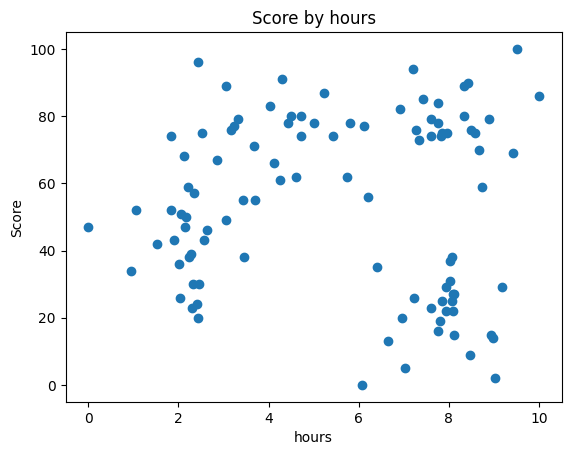

In [6]:
plt.scatter(X[:, 0], X[:, 1]) # X축: hours, Y축: Score
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('Score')
plt.show()

### 데이터 시각화(축 범위 통일)

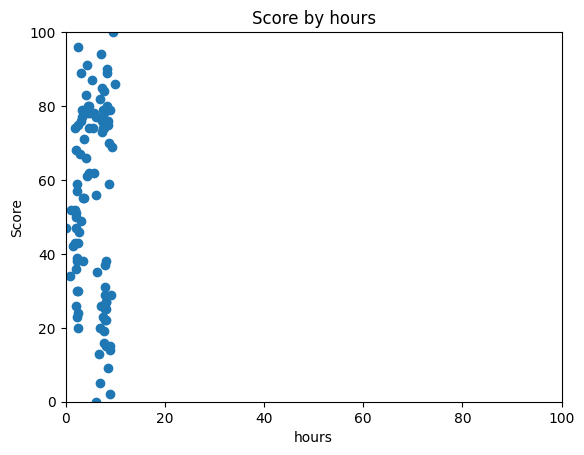

In [7]:
plt.scatter(X[:, 0], X[:, 1]) # X축: hours, Y축: Score
plt.title('Score by hours')
plt.xlabel('hours')
plt.xlim(0, 100)
plt.ylabel('Score')
plt.ylim(0, 100)
plt.show()

### 피처 스케일링(Feature Scaling)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [9]:
X[:5]

array([[ 0.68729921,  0.73538376],
       [-0.66687438,  0.04198891],
       [-0.77161709,  0.04198891],
       [-0.9100271 ,  1.35173473],
       [-0.8090252 ,  0.96651537]])

### 데이터 시각화 (스케일링된 데이터)

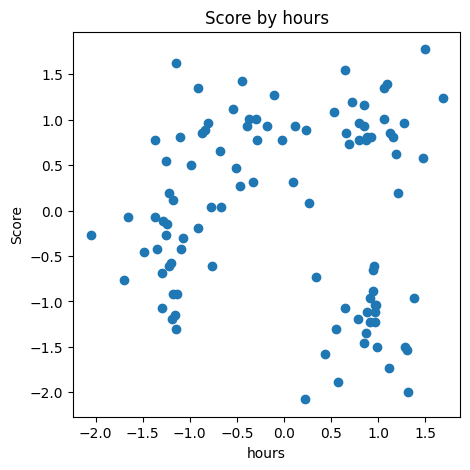

In [11]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1]) # X축: hours, Y축: Score
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('Score')
plt.show()

### 최적의 K값 찾기(Elbow Method)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

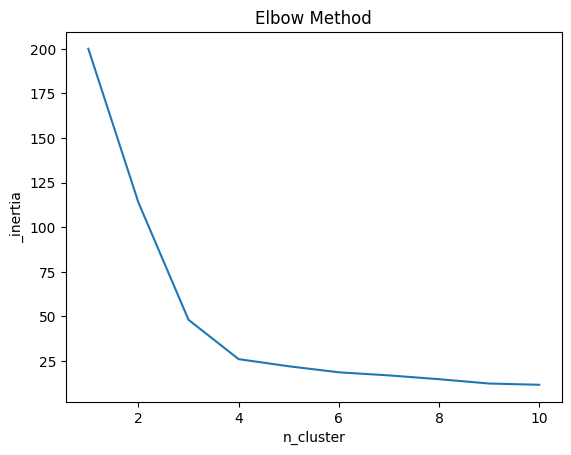

In [16]:
from sklearn.cluster import KMeans
inertias_list = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(X)
  inertias_list.append(kmeans.inertia_) # 각 지점으로부터 클러스터의 중심(centroid)까지의 거리의 제곱의 합

plt.plot(range(1, 11), inertias_list)
plt.title('Elbow Method')
plt.xlabel('n_cluster')
plt.ylabel('_inertia')
plt.show()

In [18]:
K = 4 # 최적의 k값
kmeans = KMeans(n_clusters=K, random_state=0)
# kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [19]:
y_kmeans

array([2, 3, 3, 0, 0, 1, 1, 0, 2, 0, 0, 3, 1, 3, 3, 0, 1, 2, 3, 0, 1, 0,
       3, 1, 2, 2, 3, 3, 3, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 1, 2, 3,
       3, 2, 1, 0, 1, 1, 2, 0, 1, 1, 0, 0, 0, 0, 3, 1, 1, 2, 2, 2, 2, 1,
       1, 0, 1, 2, 3, 2, 2, 2, 3, 3, 3, 3, 0, 2, 1, 2, 1, 1, 2, 0, 3, 1,
       2, 3, 0, 1, 0, 2, 3, 2, 2, 0, 1, 3], dtype=int32)

### 데이터 시각화 (최적의 K)

In [21]:
centers = kmeans.cluster_centers_ # 클러스터의 중심점 좌료
centers

array([[-0.57163957,  0.85415973],
       [ 0.8837666 , -1.26929779],
       [ 0.94107583,  0.93569782],
       [-1.22698889, -0.46768593]])

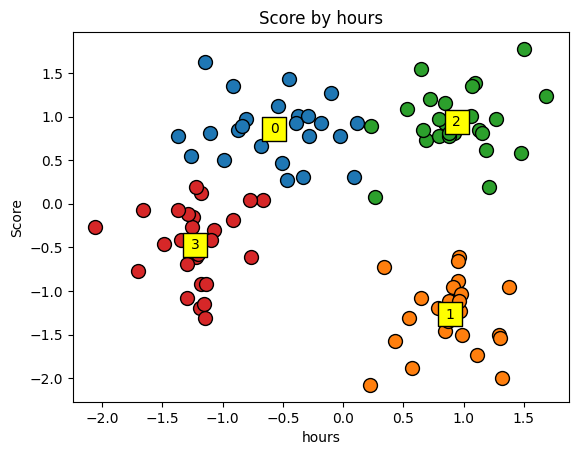

In [25]:
for cluster in range(K):
  plt.scatter(X[y_kmeans == cluster, 0], X[y_kmeans == cluster,1], s=100, edgecolors='black') # 각 데이터
  plt.scatter(centers[cluster, 0],centers[cluster, 1], s=300, edgecolors='black', color='yellow', marker='s') # 중심점 비교
  plt.text(centers[cluster, 0],centers[cluster, 1], cluster, va='center', ha='center') # 클러스터 텍스트 출력
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('Score')
plt.show()

### 데이터 시각화 (스케일링 원복)

In [26]:
X_org = sc.inverse_transform(X) # 데이터를 다시 원상복귀
X_org[:5]

array([[ 7.33, 73.  ],
       [ 3.71, 55.  ],
       [ 3.43, 55.  ],
       [ 3.06, 89.  ],
       [ 3.33, 79.  ]])

In [27]:
centers_org = sc.inverse_transform(centers) # 중심점을 다시 원상복귀
centers_org

array([[ 3.96458333, 76.08333333],
       [ 7.8552    , 20.96      ],
       [ 8.0084    , 78.2       ],
       [ 2.21269231, 41.76923077]])

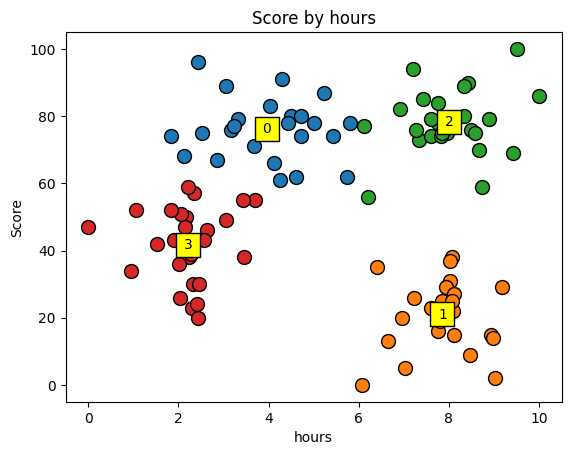

In [29]:
for cluster in range(K):
  plt.scatter(X_org[y_kmeans == cluster, 0], X_org[y_kmeans == cluster,1], s=100, edgecolors='black') # 각 데이터
  plt.scatter(centers_org[cluster, 0],centers_org[cluster, 1], s=300, edgecolors='black', color='yellow', marker='s') # 중심점 비교
  plt.text(centers_org[cluster, 0],centers_org[cluster, 1], cluster, va='center', ha='center') # 클러스터 텍스트 출력
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('Score')
plt.show()